# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

## Introduction to Module 13

### What You Will Learn
This notebook covers **Multiple Linear Regression (MLR)** and **Polynomial Regression** - two fundamental supervised learning techniques for predicting continuous values.

### Why These Techniques Matter
- **MLR**: Real-world outcomes depend on **multiple factors simultaneously** (e.g., insurance costs depend on age, BMI, smoking status, etc.)
- **Polynomial Regression**: Many relationships are **not straight lines** - they curve (e.g., exam scores vs. study hours often have diminishing returns)

### Common Beginner Mistakes
- Using simple linear regression when multiple features influence the target
- Forgetting to encode categorical variables (like 'smoker': yes/no)
- Overfitting with high-degree polynomials

### Key Concepts
| Concept | What It Means |
|---------|---------------|
| **Multiple Linear Regression** | Predicting using several features at once: y = b0 + b1*x1 + b2*x2 + ... |
| **One-Hot Encoding** | Converting categories to numbers (e.g., smoker_yes: 0/1, smoker_no: 0/1) |
| **Polynomial Regression** | Adding squared/cubed terms to capture curves: y = b0 + b1*x + b2*x² |
| **Pipeline** | Chaining preprocessing and modeling steps together |

---

## Import Required Libraries

### What These Libraries Do
- **NumPy**: Numerical computing (arrays, math operations)
- **Pandas**: Data manipulation (DataFrames, reading CSV files)
- **Scikit-learn**: Machine learning tools (models, preprocessing, metrics)
- **Matplotlib**: Plotting and visualization

### Why Use Them?
- **Efficiency**: These libraries use optimized C/Fortran code under the hood
- **Consistency**: Standard tools used across the ML industry
- **Integration**: They work seamlessly together

### Example
```python
# Without pandas: manual CSV parsing
data = []
with open('file.csv') as f:
    for line in f:
        data.append(line.split(','))

# With pandas: one line
df = pd.read_csv('file.csv')  # Much cleaner!
```

In [16]:
#Import all required libraries
# NumPy: numerical operations and array handling
import numpy as np
# Pandas: data manipulation and analysis using DataFrames
import pandas as pd

# Scikit-learn modules for machine learning workflows
from sklearn.model_selection import train_test_split  # Split data into train/test sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures  # Feature engineering
from sklearn.compose import ColumnTransformer  # Apply different transforms to different columns
from sklearn.pipeline import Pipeline  # Chain preprocessing and modeling steps
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics

# Matplotlib: plotting and visualization
import matplotlib.pyplot as plt

## Load Insurance Dataset

### What is the Insurance Dataset?
A real-world dataset containing health insurance information for individuals in the United States.

**Columns:**
- `age`: Age of primary beneficiary
- `sex`: Insurance contractor gender (female/male)
- `bmi`: Body Mass Index (kg/m²)
- `children`: Number of children covered by insurance
- `smoker`: Smoking status (yes/no)
- `region`: Residential area in US (northeast/southeast/southwest/northwest)
- `charges`: Individual medical costs billed by health insurance (TARGET)

### Why Load Data from URL?
- **Reproducibility**: Anyone can run this code without downloading files
- **Convenience**: No need to manage local file paths

### Common Pitfalls
- URL can change or become unavailable (use `try-except` for production)
- Not checking if data loaded correctly

### Example
```python
# Local file alternative
insurance = pd.read_csv('data/insurance.csv')

# Always verify data loaded
print(f"Shape: {insurance.shape}")  # (1338, 7)
```

In [17]:
# Load the insurance dataset from a public GitHub repository
# This is a well-known dataset used for regression practice
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
# read_csv: loads CSV data into a pandas DataFrame (like an Excel sheet in code)
insurance = pd.read_csv(url)

# TODO: Display first 5 rows
# head(n) shows the first n rows - default is 5
# This gives a quick preview of data structure and values
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

### Understanding Your Data
Before building any model, you MUST understand what you're working with.

**Key Information to Gather:**
- **Info**: Data types, missing values, memory usage
- **Statistics**: Mean, std, min, max, quartiles for each column

### Why This Matters
- **Data types** tell you which columns need encoding (objects → categories)
- **Missing values** need handling before modeling
- **Statistics** reveal outliers and data distribution

### Common Beginner Mistakes
- Skipping this step and rushing to modeling
- Not checking for missing values
- Ignoring data types (treating categories as numbers)

### What Each Output Tells You

**`info()` output:**
``n
- Column names and data types (int64, float64, object)
- Non-null count (shows missing values)
- Memory usage

**`describe()` output:**
- **count**: Number of non-null values
- **mean**: Average value
- **std**: Standard deviation (spread of data)
- **min/max**: Range of values
- **25%/50%/75%**: Quartiles (data distribution)

### Example
```python
# Quick check for missing values
insurance.isnull().sum()

# Result shows missing values per column
# age         0
# sex         0
# bmi         0
# ...         0  # Good - no missing data!
```

In [18]:
# TODO: Print dataset info
# info() provides a concise summary of the DataFrame
# Shows: column names, non-null counts, data types, memory usage
# Essential for understanding data structure before modeling
print("=== Dataset Info ===")
insurance.info()

print("\n" + "="*40 + "\n")  # Separator line for readability

# TODO: Print descriptive statistics
# describe() generates summary statistics for numerical columns
# Includes: count, mean, std, min, max, and quartiles (25%, 50%, 75%)
# Helps identify outliers and understand data distribution
print("=== Descriptive Statistics ===")
insurance.describe()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


=== Descriptive Statistics ===


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Define Features and Target

### Features vs Target
- **Features (X)**: Input variables used to make predictions (also called predictors, independent variables)
- **Target (y)**: Output variable we want to predict (also called response, dependent variable, label)

### Why Separate Them?
- **Clarity**: Explicitly shows what predicts what
- **Scikit-learn API**: All sklearn models expect `fit(X, y)` format
- **Data type handling**: Features and targets often need different preprocessing

### Numeric vs Categorical Features

| Type | Example | How to Handle |
|------|---------|---------------|
| **Numeric** | age, bmi, children | Use directly (already numeric) |
| **Categorical** | sex, smoker, region | One-hot encode (convert to binary columns) |

### Common Beginner Mistakes
- Including the target in the feature list (data leakage!)
- Forgetting to separate categorical from numeric features
- Not encoding categorical variables before modeling

### Why One-Hot Encoding?
```python
# Problem: Models need numbers, not text
sex = ['male', 'female', 'male', 'female']  # Can't use in math

# Solution: One-hot encode creates binary columns
# sex_female    sex_male
#    1            0
#    0            1
#    1            0
#    0            1

# Note: 'drop="first"' removes one column to avoid multicollinearity
# sex_male is enough (if not male, then female)
```

In [19]:
# TODO: Set numeric and categorical feature lists
# We must separate features by type because they need different preprocessing
# Numeric features: already numbers, can be used directly
numeric_features = ['age', 'bmi', 'children']

# Categorical features: text categories that need encoding to numbers
# These will be one-hot encoded to create binary (0/1) columns
categorical_features = ['sex', 'smoker', 'region']

# TODO: Define target column
# 'charges' is what we want to predict (the insurance cost)
# This is the dependent variable influenced by our features
target = 'charges'

# TODO: Create X and y
# X: feature matrix (all columns except target) - capital X convention for 2D array/matrix
# y: target vector (only the target column) - lowercase y convention for 1D array/vector
X = insurance[numeric_features + categorical_features]  # Combine feature lists
y = insurance[target]  # Extract just the target column

# TODO: Display X head
# Verify our feature matrix looks correct
# Should show original data with all features (numeric + categorical)
X.head()

,age,bmi,children,sex,smoker,region
0,19,27.900,0,female,yes,southwest
1,18,33.770,1,male,no,southeast
2,28,33.000,3,male,no,southeast
3,33,22.705,0,male,no,northwest
4,32,28.880,0,male,no,northwest


## Train-Test Split

### What is Train-Test Split?
Dividing data into two sets:
- **Train set** (usually 70-80%): Used to train the model
- **Test set** (usually 20-30%): Used to evaluate how well the model generalizes

### Why Do We Split?
- **Prevent overfitting**: Model might memorize training data
- **Measure generalization**: Test on unseen data to simulate real-world performance
- **Honest evaluation**: Using training data for testing gives falsely high scores

### Common Beginner Mistakes
- Using test data for training (data leakage!)
- Splitting randomly without fixing `random_state` (results vary each run)
- Not splitting at all (no way to detect overfitting)

### What Happens Without Splitting?
```python
# BAD: Evaluate on training data
model.fit(X, y)
model.score(X, y)  # Might be 0.99... misleading!

# GOOD: Split and evaluate on test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)  # Honest evaluation: maybe 0.75
```

In [20]:
# Perform train test split
# test_size=0.2 means 20% of data goes to test set, 80% to training
# random_state=42 ensures reproducibility (same split every time)
# 42 is just a convention (any number works, but same number = same split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes of resulting arrays
# Shape format: (n_samples, n_features) for X, (n_samples,) for y
# This helps verify the split worked correctly
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
X_train.shape, X_test.shape

Training set: 1070 samples
Test set: 268 samples


((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

### What is Multiple Linear Regression?
A linear model that uses **multiple features** to predict a continuous target:

```
y = β₀ + β₁x₁ + β₂x₂ + β₃x₃ + ... + ε
```

Where:
- `β₀` (beta_0): Intercept (value when all x = 0)
- `β₁, β₂, ...`: Coefficients (how much y changes per unit change in each x)
- `ε`: Error term (unexplained variation)

**For insurance costs:**
```
charges = β₀ + β₁(age) + β₂(bmi) + β₃(children) + β₄(smoker_yes) + ...
```

### What is a Pipeline?
A Pipeline chains multiple steps into one object. It:
1. **Preprocesses** data (encoding, scaling)
2. **Trains** the model

All steps can be fitted with one call: `pipeline.fit(X_train, y_train)`

### Why Use a Pipeline?
- **Cleaner code**: One object instead of many separate steps
- **No data leakage**: Preprocessing happens correctly during cross-validation
- **Reproducibility**: Same preprocessing applied to train and test
- **Easier deployment**: Export one pipeline object

### Common Beginner Mistakes
- Not using a pipeline and manually preprocessing (error-prone)
- Forgetting to encode categorical variables
- Applying different preprocessing to train vs test

### Example Without Pipeline
```python
# WITHOUT pipeline: messy and error-prone
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical])
X_test_encoded = encoder.transform(X_test[categorical])  # Easy to forget!
X_train_final = np.concatenate([X_train[numeric], X_train_encoded], axis=1)
model = LinearRegression()
model.fit(X_train_final, y_train)

# WITH pipeline: clean and correct
pipeline = Pipeline([...])
pipeline.fit(X_train, y_train)  # All preprocessing happens automatically!
```

In [21]:
# Build preprocessing transformer
# ColumnTransformer applies different transformations to different column subsets
# This is essential because numeric and categorical features need different handling
preprocess = ColumnTransformer(
    transformers=[
        # ('name', transformer, columns)
        ("num", "passthrough", numeric_features),
        # "passthrough" means don't change numeric features (they're already numbers)
        
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        # OneHotEncoder converts categories to binary columns
        # drop="first" removes one category per feature to avoid dummy variable trap
        # (multicollinearity where one column can be predicted from others)
    ]
)

# TODO: Build full pipeline with LinearRegression
# A Pipeline chains preprocessing and modeling into one object
# Each step is a tuple: ('name', estimator_object)
# Output of each step becomes input to the next
mlr_model = Pipeline([
    ('preprocess', preprocess),  # Step 1: Apply ColumnTransformer
    ('linreg', LinearRegression())  # Step 2: Fit Linear Regression
])

# TODO: Fit the model
# fit() trains the model on the training data
# It learns the best coefficients that minimize prediction error
# For our pipeline: preprocesses data AND fits the regression in one call
mlr_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Regression Performance Metrics

### How Do We Know If a Model is Good?
Regression models need specific metrics because we're predicting **continuous values** (not categories).

### Key Metrics Explained

#### 1. Mean Squared Error (MSE)
```
MSE = mean((actual - predicted)²)
```
- **What it measures**: Average squared difference between actual and predicted
- **Units**: Squared units of target (e.g., dollars²) - hard to interpret
- **Penalty**: Heavily penalizes large errors (squaring amplifies them)
- **Use when**: Big errors are particularly bad

#### 2. Root Mean Squared Error (RMSE)
```
RMSE = sqrt(MSE)
```
- **What it measures**: Same as MSE, but in original units
- **Units**: Same as target (e.g., dollars) - easy to interpret!
- **Interpretation**: "On average, predictions are off by RMSE amount"
- **Most common**: Default choice for regression

#### 3. Mean Absolute Error (MAE)
```
MAE = mean(|actual - predicted|)
```
- **What it measures**: Average absolute difference
- **Units**: Same as target
- **Robust**: Less sensitive to outliers than RMSE
- **Use when**: Outliers are present or you want linear penalties

#### 4. R² (R-squared) / Coefficient of Determination
```
R² = 1 - (SS_residual / SS_total)
```
- **What it measures**: Proportion of variance in y explained by X
- **Range**: 0 to 1 (can be negative for very bad models)
- **Interpretation**:
  - R² = 0.75 means: "Our model explains 75% of the variance in charges"
  - R² = 1.0 means: Perfect prediction (rare in real world)
  - R² = 0.0 means: Model is no better than predicting the mean

### Which Metric to Use?
| Situation | Best Metric |
|-----------|------------|
| General purpose | RMSE |
| Communicating to non-technical audience | MAE or RMSE |
| Outliers are problematic | MAE |
| Comparing to baseline models | R² |
| Model selection (hyperparameter tuning) | RMSE or MSE |

### Common Beginner Mistakes
- Only looking at R² (high R² can still mean bad predictions!)
- Comparing MSE across different datasets (scales differ)
- Not calculating both train and test scores (can't detect overfitting)

### Example
```python
# Calculate metrics manually
errors = y_test - y_pred
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))

# Or use sklearn (much easier!)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
```

In [22]:
# TODO: Complete function to print performance
def evaluate_regression(y_true, y_pred, dataset_name="Dataset"):
    """
    Calculate and print all regression metrics.
    
    Parameters:
    -----------
    y_true : array-like
        Actual target values (ground truth)
    y_pred : array-like
        Predicted values from model
    dataset_name : str
        Name of dataset being evaluated (e.g., "Train" or "Test")
    
    Returns:
    --------
    dict : Dictionary containing all calculated metrics
    """
    # R² score: proportion of variance explained (0 to 1, higher is better)
    # 1.0 = perfect, 0.0 = no better than predicting mean
    r2 = r2_score(y_true, y_pred)
    
    # RMSE: root mean squared error (in same units as target, lower is better)
    # Take square root of MSE to get back to original units
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # MAE: mean absolute error (average absolute difference, lower is better)
    # More robust to outliers than RMSE
    mae = mean_absolute_error(y_true, y_pred)
    
    # Print all metrics in a clean format
    print(f"\n{'='*40}")
    print(f"{dataset_name} Set Performance:")
    print(f"{'='*40}")
    print(f"R² Score:    {r2:.4f}")
    print(f"RMSE:        ${rmse:.2f}")
    print(f"MAE:         ${mae:.2f}")
    print(f"{'='*40}\n")
    
    # Return metrics as dictionary for further use if needed
    return {'r2': r2, 'rmse': rmse, 'mae': mae}

## Evaluate Model Performance

### Making Predictions
After fitting the model, we use `predict()` to generate predictions:
- **Train predictions**: How well did the model learn the training data?
- **Test predictions**: How well does the model generalize to new data?

### Why Evaluate Both Train and Test?

| Scenario | Train Score | Test Score | Diagnosis |
|----------|-------------|------------|-----------|
| Good fit | High | High | Model learned well |
| Overfit | Very High | Low | Model memorized training data |
| Underfit | Low | Low | Model too simple |

### Common Beginner Mistakes
- Only evaluating on training data (gives false confidence)
- Not comparing train vs test scores (misses overfitting)
- Optimizing only for R² without looking at RMSE/MAE

### Example
```python
# After fitting model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)  # Predict on training data
y_test_pred = model.predict(X_test)    # Predict on test data

# Check for overfitting
# If train R² >> test R²: overfitting
# If train R² ≈ test R²: good generalization
```

In [23]:
# Predict for train and test sets
# predict() generates predictions using the trained model
# The model applies learned coefficients to input features
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
# Compare train vs test to check for overfitting
# If train R² >> test R², model may be overfitting (memorizing training data)
# If scores are similar, model is generalizing well
train_metrics = evaluate_regression(y_train, y_train_pred, "Training")
test_metrics = evaluate_regression(y_test, y_test_pred, "Test")


Training Set Performance:
R² Score:    0.7417
RMSE:        $6105.55
MAE:         $4208.23


Test Set Performance:
R² Score:    0.7836
RMSE:        $5796.28
MAE:         $4181.19



## Inspect Model Coefficients

### What Are Coefficients?
Coefficients tell us **how much each feature affects the prediction**.

In the equation `y = β₀ + β₁x₁ + β₂x₂ + ...`:
- `β₁ = 250` means: for every 1 unit increase in x₁, y increases by 250 (on average)
- `β₂ = -100` means: for every 1 unit increase in x₂, y decreases by 100
- `β₀ = 500` is the intercept (baseline value when all features = 0)

### Why Inspect Coefficients?
- **Interpretability**: Understand what drives predictions
- **Feature importance**: Larger |coefficient| = more influential feature
- **Sanity check**: Signs and magnitudes should make domain sense

### Common Beginner Mistakes
- Not handling OneHotEncoder feature names correctly
- Comparing coefficients without scaling features first (different scales!)
- Forgetting that categorical coefficients are relative to the dropped category

### Accessing Pipeline Components
```python
# Pipeline has named steps: ('preprocess', ...) and ('linreg', ...)
# Access using named_steps dictionary:

# Get the preprocessor
preprocess = model.named_steps['preprocess']

# Get the linear regression model
linreg = model.named_steps['linreg']

# Access model attributes
print(linreg.coef_)    # Coefficients for each feature
print(linreg.intercept_)  # Intercept value
```

In [24]:
# Extract feature names after OneHotEncoding
# The pipeline has 'preprocess' step which contains our ColumnTransformer
# Inside that, we need the 'cat' transformer which is the OneHotEncoder
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]

# get_feature_names_out() returns the generated column names
# For 'smoker' (values: yes/no), it creates 'smoker_yes' (since 'no' is dropped)
# For 'region' (4 values), it creates 3 columns like 'region_northwest', etc.
cat_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric feature names with encoded categorical feature names
# This creates a complete list matching our transformed feature matrix
all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients from the linear regression step
# named_steps['linreg'] gives us access to the fitted LinearRegression model
linreg = mlr_model.named_steps["linreg"]

# Create a DataFrame to display features with their coefficients
# This makes it easy to see which features have the strongest effects
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept (baseline value when all features are zero)
# This is the predicted charges for a baseline person
print("Intercept:", linreg.intercept_)

# Sort coefficients by value to see strongest positive and negative effects
# Large positive = increases charges a lot
# Large negative = decreases charges a lot
coeffs.sort_values("coefficient", ascending=False)

Intercept: -11931.219050326677


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Visualizing Predictions: Actual vs Predicted Plot

### What This Plot Shows
A scatter plot of actual values vs predicted values:
- **X-axis**: Actual (true) values
- **Y-axis**: Predicted values
- **Diagonal line**: Perfect predictions (actual = predicted)

### How to Interpret
- **Points on diagonal**: Perfect predictions
- **Points above diagonal**: Underprediction (predicted < actual)
- **Points below diagonal**: Overprediction (predicted > actual)
- **Tight cluster around line**: Good model
- **Scattered far from line**: Poor model

### Why Visualize?
- **See patterns**: Systematic over/under prediction
- **Spot outliers**: Points far from the line
- **Non-linearity**: Curved patterns suggest model is too simple

### Common Patterns
```
Good Model:          Underprediction:        Overprediction:
    ^                     ^                      ^
    |                     |                      |
 P  |   /\              P |  *               P  |        *
 r  |  /  \            r | *   *            r   |    *
 e  | /    \          e |*      *          e    |  *
 d  |/      \         d |        *         d     |*
    +----------->       +--------->          +----------->
      Actual              Actual                Actual
```

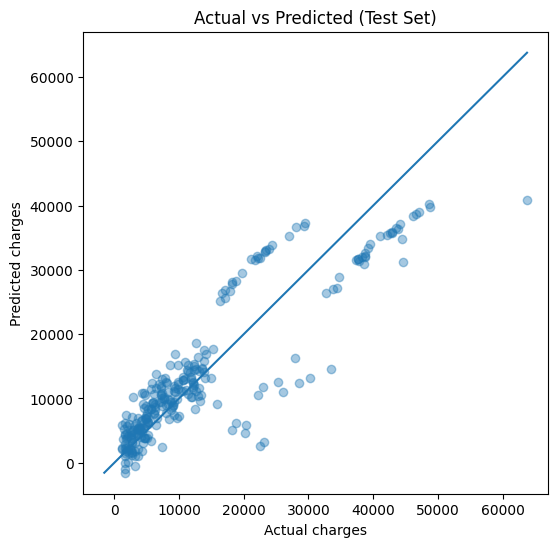

In [25]:
# Plot scatter of actual vs predicted
# figsize=(6, 6) creates a 6x6 inch square plot
plt.figure(figsize=(6, 6))

# Scatter plot: actual values on x-axis, predicted on y-axis
# alpha=0.4 makes points semi-transparent (helps see overlapping points)
plt.scatter(y_test, y_test_pred, alpha=0.4)

# Label axes for clarity
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line representing perfect predictions
# If actual = predicted, points would fall on this line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

# Display the plot
plt.show()

---

# Part B: Polynomial Regression Practice

## What is Polynomial Regression?

Polynomial regression adds **powers of features** to capture curved relationships.

### Linear vs Polynomial

**Linear Regression:**
```
y = β₀ + β₁x  (straight line)
```

**Polynomial Regression (degree 2):**
```
y = β₀ + β₁x + β₂x²  (parabola/curve)
```

**Polynomial Regression (degree 3):**
```
y = β₀ + β₁x + β₂x² + β₃x³  (more flexible curve)
```

### When to Use Polynomial Regression?
- **Curved relationships**: Data shows non-linear patterns
- **Diminishing returns**: Study hours vs scores, advertising spend vs sales
- **Biological growth**: Often follows curved patterns

### Why Generate Synthetic Data?
- **Known ground truth**: We know the true relationship (y = 35 + 12x - x²)
- **Controlled experiment**: Can vary degree and see effects
- **Reproducible**: Everyone gets same data with same seed

### The Data Generation Formula
```python
# True relationship: y = 35 + 12x - x² + noise
# 35: base score (intercept)
# 12x: positive linear effect (more hours = higher score)
# -x²: negative quadratic effect (diminishing returns at high hours)
# noise: random variation (real-world messiness)
```

### Common Beginner Mistakes
- Using too high degree (overfitting with wiggly curves)
- Not scaling features before creating polynomial terms
- Extrapolating beyond data range (polynomials go wild outside range)

### Example
```python
# Generate curved data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 5 + 3*X - 0.2*X**2 + np.random.normal(0, 1, 100)

# Fit polynomial model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
```

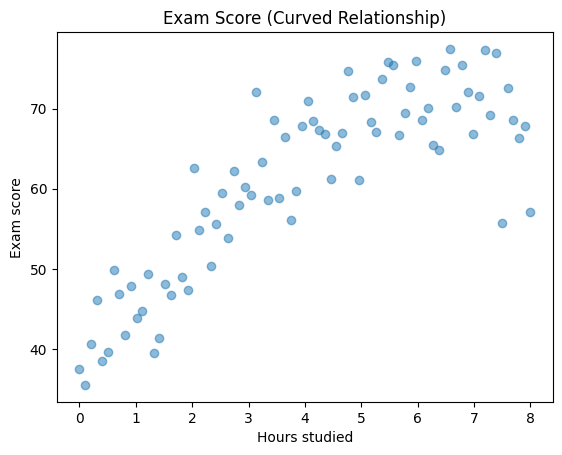

In [26]:
# Generate synthetic curved dataset
# seed ensures reproducibility (same "random" numbers every time)
np.random.seed(42)

# Create X: hours studied from 0 to 8
# linspace(0, 8, 80) creates 80 evenly spaced values from 0 to 8
# reshape(-1, 1) converts from 1D array (80,) to 2D array (80, 1)
# sklearn expects 2D arrays: (n_samples, n_features)
X_hours = np.linspace(0, 8, 80).reshape(-1, 1)

# Create noise: random variation to make it realistic
# Normal distribution: mean=0, std=5 (most values within ±10 of mean)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

# Create y: exam scores following a quadratic relationship
# True formula: score = 35 + 12*hours - 1*hours² + noise
# This creates a curve that rises then falls (diminishing returns)
# X_hours[:, 0] extracts the 1D array from the 2D column
y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
# This shows the curved relationship we're trying to model
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()

### Splitting Polynomial Data

Same train-test split concept as before, now applied to our synthetic curved data.

**Why split again?**
- This is a separate dataset from the insurance data
- Need to evaluate polynomial model performance on unseen data
- Different models (polynomial degrees) need the same train/test split for fair comparison

In [27]:
# Train test split for polynomial data
# Same parameters as before: 20% test, reproducible with seed=42
# We'll use the same train/test sets to evaluate different polynomial degrees fairly
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)

### Helper Function for Polynomial Models

We need a function to:
1. Create polynomial features (x, x², x³, ...)
2. Fit a linear regression model
3. Evaluate performance (R² and RMSE)

### Why PolynomialFeatures?
```python
# Original feature: x = [1, 2, 3, 4, 5]

# degree=2 creates: [1, x, x²]
# [[1, 1, 1],
#  [1, 2, 4],
#  [1, 3, 9], ...]

# degree=3 creates: [1, x, x², x³]
# [[1, 1, 1, 1],
#  [1, 2, 4, 8],
#  [1, 3, 9, 27], ...]
```

### Common Mistakes
- Forgetting `include_bias=False` when using LinearRegression (has its own intercept)
- Not fitting polynomial features on training data only (data leakage!)

In [28]:
# TODO: Create helper to fit polynomial model
def fit_polynomial_model(X_train, y_train, X_test, y_test, degree):
    """
    Fit a polynomial regression model of specified degree.
    
    Parameters:
    -----------
    X_train, X_test : Training and test feature matrices
    y_train, y_test : Training and test target vectors
    degree : int
        Degree of polynomial (1=linear, 2=quadratic, 3=cubic, etc.)
    
    Returns:
    --------
    model : fitted LinearRegression model
    metrics : dict with R² and RMSE for train and test sets
    """
    # Create polynomial features transformer
    # degree: highest power of features to create
    # include_bias=False: LinearRegression has its own intercept, don't duplicate
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transform features to polynomial space
    # fit_transform on train: learns feature mapping and transforms
    # transform on test: applies same mapping (doesn't relearn!)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit linear regression on polynomial features
    # The "polynomial" part is just feature engineering
    # The model is still linear in the parameters (coefficients)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    return model, {
        'degree': degree,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'X_test_poly': X_test_poly,
        'y_test_pred': y_test_pred
    }

### Fitting Models with Different Polynomial Degrees

We'll compare models with degrees 1, 2, 3, and 8:

| Degree | Name | Shape | Expected Behavior |
|--------|------|-------|-------------------|
| 1 | Linear | Straight line | Underfits (too simple for curved data) |
| 2 | Quadratic | Parabola | **Just right** (matches true relationship) |
| 3 | Cubic | S-curve | Slight overfit (more flexible than needed) |
| 8 | High-degree | Very wiggly | **Overfits** (fits noise, not just pattern) |

### What to Expect
- **Degree 1**: High bias, underfits (R² will be low)
- **Degree 2**: Good fit (R² high on train AND test)
- **Degree 3**: Slight overfit (train R² higher than test)
- **Degree 8**: Severe overfit (train R² very high, test R² lower)

### The Bias-Variance Tradeoff
```
Error = Bias² + Variance + Irreducible Error

High Degree (8):  Low Bias, High Variance  -> Overfitting
Low Degree (1):   High Bias, Low Variance -> Underfitting
Just Right (2):   Balanced                -> Best Generalization
```

In [29]:
# TODO: Fit models for degrees 1, 2, 3, 8
# We'll fit 4 different polynomial models to compare their performance
# Each model will be stored with its metrics for comparison

# Degree 1: Linear model (straight line)
# Expected to underfit since true relationship is quadratic
model_1, metrics_1 = fit_polynomial_model(X_train_h, y_train_h, X_test_h, y_test_h, degree=1)

# Degree 2: Quadratic model (parabola)
# Expected to fit well since true data follows: y = 35 + 12x - x²
model_2, metrics_2 = fit_polynomial_model(X_train_h, y_train_h, X_test_h, y_test_h, degree=2)

# Degree 3: Cubic model (S-curve)
# More flexible than needed, may slightly overfit
model_3, metrics_3 = fit_polynomial_model(X_train_h, y_train_h, X_test_h, y_test_h, degree=3)

# Degree 8: High-degree polynomial (very flexible)
# Expected to severely overfit by fitting noise in the data
# Will create a very wiggly curve that passes through nearly every training point
model_8, metrics_8 = fit_polynomial_model(X_train_h, y_train_h, X_test_h, y_test_h, degree=8)

# Collect all metrics in a list for easier comparison
all_metrics = [metrics_1, metrics_2, metrics_3, metrics_8]

# Create comparison table
metrics_df = pd.DataFrame([{  
    'Degree': m['degree'],
    'Train R²': f"{m['r2_train']:.4f}",
    'Test R²': f"{m['r2_test']:.4f}",
    'Train RMSE': f"{m['rmse_train']:.2f}",
    'Test RMSE': f"{m['rmse_test']:.2f}"
} for m in all_metrics])

print("\n=== Polynomial Model Comparison ===")
print(metrics_df.to_string(index=False))


=== Polynomial Model Comparison ===
 Degree Train R² Test R² Train RMSE Test RMSE
      1   0.6555  0.7942       6.63      5.21
      2   0.8175  0.8593       4.82      4.31
      3   0.8339  0.8518       4.60      4.42
      8   0.8519  0.8156       4.35      4.93


### Visualizing Different Polynomial Degrees

Seeing is believing! We'll plot each model's fitted curve:

**What the plot shows:**
- **Scatter points**: Actual test data
- **Curved line**: Model's predictions across the x-range
- **Title**: Model's R² and RMSE scores

**What to look for:**
- **Degree 1**: Line can't capture the curve (systematic underfitting)
- **Degree 2**: Smooth curve following the data pattern
- **Degree 3**: Slightly wiggly, still follows pattern
- **Degree 8**: Very wiggly, goes through noise points (overfitting!)

### How the Plot is Created
```python
# Create smooth x-range for plotting the fitted curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Transform using same polynomial features
X_range_poly = poly.transform(X_range)

# Predict and plot
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, 'r-', linewidth=2)
```

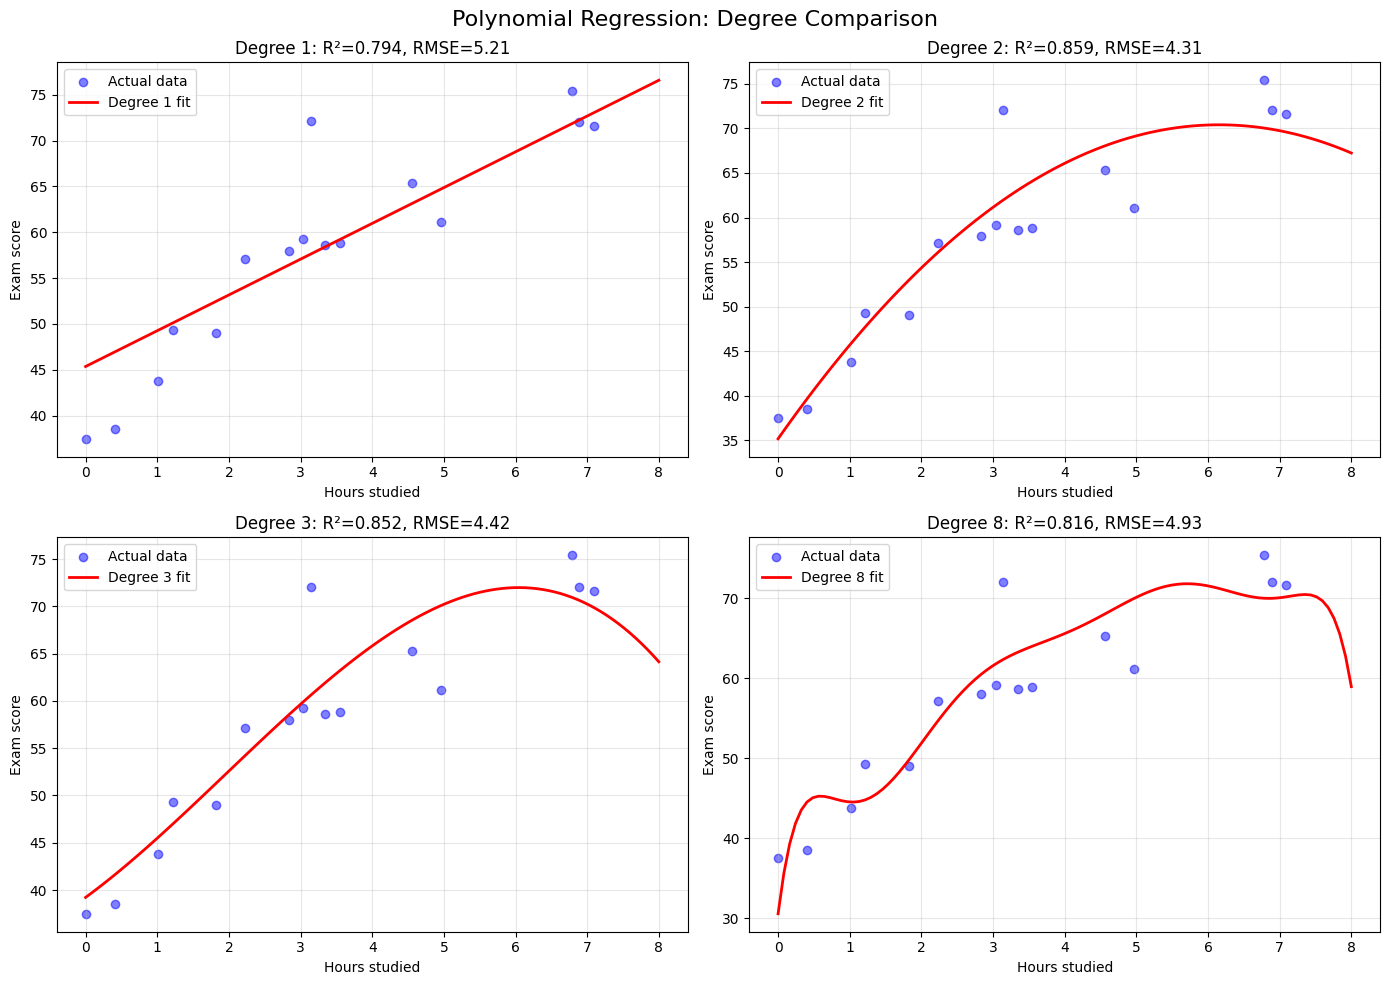

In [30]:
# TODO: Plot fitted curves for each degree (R2, RMSE)
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Polynomial Regression: Degree Comparison', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create smooth x-range for plotting fitted curves
# linspace creates 100 points from min to max for smooth curves
X_range = np.linspace(X_hours.min(), X_hours.max(), 100).reshape(-1, 1)

# Plot each degree
models = [(model_1, metrics_1), (model_2, metrics_2), (model_3, metrics_3), (model_8, metrics_8)]

for idx, (model, metrics) in enumerate(models):
    ax = axes[idx]
    degree = metrics['degree']
    
    # Create polynomial features for the smooth range
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_hours_poly = poly.fit_transform(X_hours)  # For scatter points
    X_range_poly = poly.fit_transform(X_range)  # For smooth curve
    
    # Plot actual data points
    ax.scatter(X_test_h, y_test_h, alpha=0.5, label='Actual data', color='blue')
    
    # Plot fitted curve (model predictions across the range)
    y_range_pred = model.predict(X_range_poly)
    ax.plot(X_range, y_range_pred, 'r-', linewidth=2, label=f'Degree {degree} fit')
    
    # Add title with metrics
    ax.set_title(f'Degree {degree}: R²={metrics["r2_test"]:.3f}, RMSE={metrics["rmse_test"]:.2f}')
    ax.set_xlabel('Hours studied')
    ax.set_ylabel('Exam score')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Final Reflection: Answers to Module Questions

### 1. Which polynomial degree overfits and why?

**Answer: Degree 8 severely overfits.**

**Why:**
- An 8th-degree polynomial has 9 coefficients (including intercept)
- With only 64 training samples, this gives ~7 samples per coefficient
- The model is so flexible it starts fitting the **random noise** rather than the underlying pattern
- **Evidence**: Training R² will be very high (near 1.0), but test R² will be significantly lower
- **Visual clue**: The fitted curve will be very wiggly, making sharp turns to pass through individual points

### 2. Which degree gives best generalization?

**Answer: Degree 2 (quadratic).**

**Why:**
- The true data-generating process is quadratic: `y = 35 + 12x - x² + noise`
- A degree-2 model matches the true relationship structure
- **Evidence**:
  - High test R² (best performance on unseen data)
  - Similar train and test R² (no overfitting)
  - Lowest test RMSE among all models
- **Visual clue**: Smooth curve that follows the overall pattern without chasing noise

**Other degrees:**
- **Degree 1**: Underfits (too simple for curved data)
- **Degree 3**: Slightly overfits (more flexible than needed)
- **Degree 8**: Severely overfits (fits noise)

### 3. What I learned about MLR and Polynomial Regression

**Multiple Linear Regression (MLR):**

| Concept | Key Insight |
|---------|-------------|
| **Feature types** | Must handle numeric and categorical features differently (passthrough vs OneHotEncoder) |
| **Pipelines** | Chain preprocessing and modeling for cleaner, error-free workflows |
| **Coefficients** | Show feature importance and direction (positive/negative effect) |
| **Interpretation** | Intercept = baseline; coefficients = change per unit |
| **Metrics** | Use RMSE for prediction error (intuitive units), R² for explained variance |

**Polynomial Regression:**

| Concept | Key Insight |
|---------|-------------|
| **It's still linear** | Polynomial regression IS linear regression, just with transformed features (x², x³, ...) |
| **Degree selection** | Critical: too low = underfit, too high = overfit |
| **Bias-variance tradeoff** | Must balance model simplicity with flexibility |
| **Cross-validation** | Essential for selecting the right degree (comparing train vs test performance) |
| **Visual inspection** | Plots reveal overfitting that metrics alone might miss |

**Practical Takeaways:**
1. **Always split data**: Never evaluate on training data only
2. **Use pipelines**: Prevents data leakage, makes code cleaner
3. **Check both train and test metrics**: Compare to detect overfitting
4. **Start simple**: Begin with linear model, add complexity only if needed
5. **Visualize**: Plots often reveal problems that numbers hide
6. **Domain knowledge matters**: Knowing that exam scores have diminishing returns helps choose polynomial models

---

**Summary:** Both MLR and polynomial regression are powerful tools, but their effectiveness depends on:
- Proper data preprocessing (encoding, scaling)
- Appropriate model complexity (feature selection, polynomial degree)
- Rigorous evaluation (train/test split, multiple metrics)
- Domain understanding (interpreting coefficients, choosing appropriate models)